# Домашняя работа 1.

---

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Линейная регрессия своими руками

In [3]:
X = np.linspace(-3, 3)
X = X + np.random.randn(len(X)) / 10.0
y = 3*X + 10 + np.random.randn(len(X))

In [4]:
X.shape, y.shape

((50,), (50,))

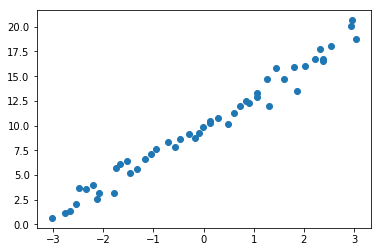

In [6]:
plt.scatter(X, y);

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ss_X = StandardScaler()
X_scaled = ss_X.fit_transform(X.reshape(-1, 1)).ravel()

ss_y = StandardScaler()
y_scaled = ss_y.fit_transform(y.reshape(-1, 1)).ravel()

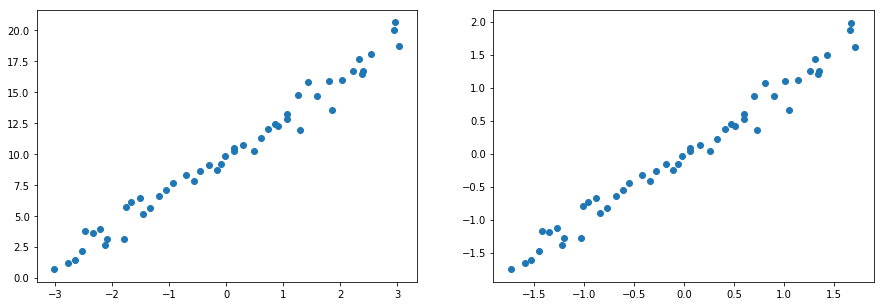

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.scatter(X.ravel(), y)
plt.subplot(122)
plt.scatter(X_scaled, y_scaled)
plt.show()

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 1: Градиентный спуск для регрессии</h3> 
    </div>
</div>

Ниже параметры прямой $k$ и $b$ проинициализированы случайным образом. Это будет сырой старт для нашей модели.

In [23]:
k = -0.75
b = 0.3

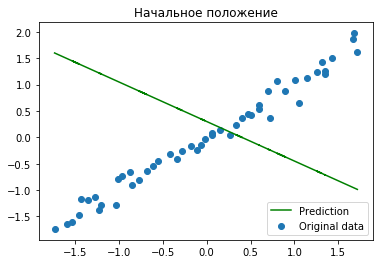

In [24]:
y_estimate = k*X_scaled + b

plt.title('Начальное положение')
plt.scatter(X_scaled, y_scaled, label='Original data')
plt.plot(X_scaled, y_estimate, label='Prediction', c='g')
plt.legend()
plt.show()

Сначала сделаем метод, формирующий предсказания:

$$ \hat{y} = h_\theta(x) = b + kx$$ 

In [25]:
def h(x, k, b):
    # Твой код здесь
    return k*x + b

Теперь функцию потерь:

$$
\begin{equation}
J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^{M}{(\hat{y}_i - y_i)^2} = \frac{1}{2m}\sum_{i=1}^{M}{(h_\theta(x_i) - y_i)^2} 
\end{equation}
$$

In [26]:
def J(y_true, y_predicted):
    # Твой код здесь
    return np.sum(np.power(y_true - y_predicted, 2)) / 2.0 / len(y_true)

In [27]:
# Должен получиться около 2.7
J(y_scaled, y_estimate)

1.5680416335695408

Теперь возьми листок и ручку и найди обе частные производные: $ \frac{\partial J}{\partial k} $ и $ \frac{\partial J}{\partial b} $.

---

Готовимся к градиентному спуску. Сперва скорость обучения $\alpha$:

In [28]:
alpha = 0.001

Теперь время вычислить обновление каждого из параметров:

$$ b \colon = b - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x_i) - y_i) $$

In [29]:
# Твой код здесь
db = -alpha*np.sum(h(X_scaled, k, b) - y_scaled) / len(y_scaled)

$$ k \colon = k - \alpha \frac{1}{m}\sum_{i=1}^{m}((h_\theta(x_i) - y_i)x_i) $$

In [30]:
# Твой код здесь
dk = -alpha* np.sum( np.multiply(h(X_scaled, k, b) - y_scaled, X_scaled) ) /len(y_scaled)

---

Окей, все детали паззла собраны, и мы теперь в состоянии реализовать свой алгоритм градиентного спуска.

Выглядит схема следующим образом:

<img src='images/grad_desc.png' width='50%'>

Осталось разобраться, что значит "до схождения". Цикл можно повторять много-много раз, но в нужный момент выйти из него. Например, тогда, когда параметры _почти_ перестанут обновляться.

In [18]:
# Твой код здесь

In [31]:
threshold = 1e-5
while True:
    db = -alpha * np.sum(h(X_scaled, k, b) - y_scaled) / len(y_scaled)
    dk = -alpha * np.sum( np.multiply(h(X_scaled, k, b) - y_scaled, X_scaled) ) / len(y_scaled)
    new_b = b + db
    new_k = k + dk
    if abs(new_b - b) < threshold and abs(new_k - k) < threshold:
        break
    b = new_b
    k = new_k

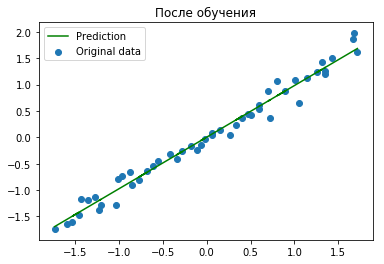

In [32]:
y_estimate = k*X_scaled + b

plt.title('После обучения')
plt.scatter(X_scaled, y_scaled, label='Original data')
plt.plot(X_scaled, y_estimate, label='Prediction', c='g')
plt.legend()
plt.show()

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 2: Стохастический градиентный спуск</h3> 
    </div>
</div>

В реальной жизни встречаются наборы данных, которые не помещаются целликом в оперативную память. Их приходится читать с диска батчами - небольшими кусочками. Особенно часто это бывает в работе с изображениями. Функция потерь в этом случае считается не по всей выборке, а по одному батчу, после этого делается обновление весов. Один полный проход по всей выборке называется одной эпохой. Также обучение батчами ускоряет схождение весов модели к оптимальным, так как делаются более частые обновления. Еще одним преимуществом является стохастичность - каждый батч является случайной подвыборкой всего датасета, поэтому модель смотрит на данные с разных точек зрения.

In [33]:
X = np.linspace(-30, 30, num=1000)
X = X + np.random.randn(len(X)) * 20
y = 3*X + 10 + np.random.randn(len(X)) * 30

In [34]:
ss_X = StandardScaler()
X_scaled = ss_X.fit_transform(X.reshape(-1, 1)).ravel()

ss_y = StandardScaler()
y_scaled = ss_y.fit_transform(y.reshape(-1, 1)).ravel()

In [35]:
batch_size = 64
epochs = 100

Обычно батч сайз выбирают степенями 2ки - например 64 или 128, а количество эпох зависит от объема данных

In [36]:
k = -0.75
b = 0.3

In [37]:
losses = [] # для записи значения функции потерь

for ep in range(epochs):
    indxs = np.arange(len(X_scaled))
    np.random.shuffle(indxs)
    
    # каждую эпоху необходимо перемешивать датасет, чтобы батчи были разные
    X_scaled = X_scaled[indxs]
    y_scaled = y_scaled[indxs]
    
    batches_count = len(X_scaled) // batch_size # количество батчей для одной эпохи
    
    for bc in range(batches_count):
        X_batch = X_scaled[bc * batch_size : (bc + 1) * batch_size]
        y_batch = y_scaled[bc * batch_size : (bc + 1) * batch_size]
        db = -alpha * np.sum(h(X_batch, k, b) - y_batch) / len(y_batch)
        dk = -alpha * np.sum(np.multiply(h(X_batch, k, b) - y_batch, X_batch) ) / len(y_batch)
        new_b = b + db
        new_k = k + dk
        b = new_b
        k = new_k
    losses.append((J(y_batch, k*X_batch + b))) # записываем значение лосса

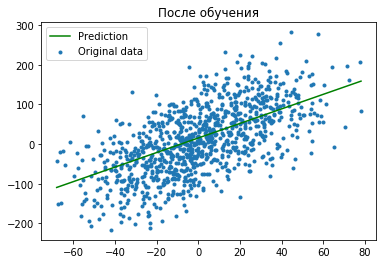

In [38]:
X_scaled.sort()
X.sort()
y_estimate = ss_y.inverse_transform(k*X_scaled + b)
# сортировка и возвращение к исходному масштабу необходимо чтобы нарисовать предсказания на исходных,
# незаскейленных данных
plt.title('После обучения')
plt.scatter(X, y, label='Original data', marker='.')
plt.plot(X, y_estimate, label='Prediction', c='g')
plt.legend()
plt.show()

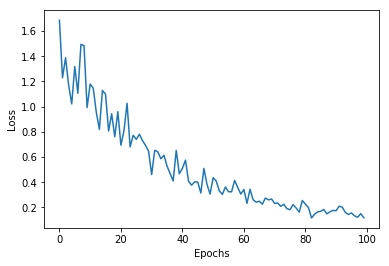

In [39]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss');

Видно, что лосс перестаёт падать примерно к 80ый эпохе, значит для обучения можно было ставить 80 эпох